## IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset


## DATA PRE-PROCESSING

### Training Image Pre-Processing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
label_mode="categorical",
image_size=(128,128)
)

Found 70295 files belonging to 38 classes.


### Validation Image Pre-Processing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
label_mode="categorical",
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [6]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[128.75 117.75 115.75]
   [133.5  122.5  120.5 ]
   [123.   112.   110.  ]
   ...
   [124.5  105.5  101.5 ]
   [122.25 103.25  99.25]
   [130.25 111.25 107.25]]

  [[126.75 115.75 113.75]
   [132.5  121.5  119.5 ]
   [128.75 117.75 115.75]
   ...
   [119.25 100.25  96.25]
   [127.25 108.25 104.25]
   [123.   104.   100.  ]]

  [[136.25 125.25 123.25]
   [130.   119.   117.  ]
   [123.25 112.25 110.25]
   ...
   [127.25 108.25 104.25]
   [133.25 114.25 110.25]
   [121.5  102.5   98.5 ]]

  ...

  [[173.5  171.5  172.5 ]
   [173.5  171.5  172.5 ]
   [173.5  171.5  172.5 ]
   ...
   [171.75 166.75 163.75]
   [168.25 163.25 160.25]
   [165.75 160.75 157.75]]

  [[177.75 175.75 176.75]
   [175.25 173.25 174.25]
   [172.   170.   171.  ]
   ...
   [172.   167.   164.  ]
   [167.75 162.75 159.75]
   [166.25 161.25 158.25]]

  [[176.   174.   175.  ]
   [174.5  172.5  173.5 ]
   [172.5  170.5  171.5 ]
   ...
   [172.5  167.5  164.5 ]
   [167.75 162.75 159.75]
   [170.   165.   16

In [ ]:
for x,y in validation_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[101.    92.   113.  ]
   [114.5  105.5  126.5 ]
   [112.25 103.25 124.25]
   ...
   [109.    95.   112.  ]
   [ 84.75  70.75  87.75]
   [122.5  108.5  125.5 ]]

  [[100.    91.   112.  ]
   [125.75 116.75 137.75]
   [102.    93.   114.  ]
   ...
   [ 88.5   74.5   91.5 ]
   [111.25  97.25 114.25]
   [114.25 100.25 117.25]]

  [[112.75 103.75 124.75]
   [128.5  119.5  140.5 ]
   [112.   103.   124.  ]
   ...
   [ 95.75  81.75  98.75]
   [ 91.25  77.25  94.25]
   [ 85.75  71.75  88.75]]

  ...

  [[191.25 195.25 207.25]
   [184.5  188.5  200.5 ]
   [192.75 196.75 208.75]
   ...
   [159.25 160.25 180.25]
   [155.   156.   176.  ]
   [150.5  151.5  171.5 ]]

  [[195.5  199.5  211.5 ]
   [194.   198.   210.  ]
   [189.   193.   205.  ]
   ...
   [159.   160.   180.  ]
   [158.5  159.5  179.5 ]
   [156.25 157.25 177.25]]

  [[192.25 196.25 208.25]
   [192.25 196.25 208.25]
   [196.   200.   212.  ]
   ...
   [155.25 156.25 176.25]
   [154.75 155.75 175.75]
   [156.25 157.25 17

## GPU SUPPORT

In [7]:
if tf.config.list_physical_devices('GPU'):
    print("OK! GPU is available and ready for use!")
else:
    print("NO! GPU not found. Falling back to CPU.")


OK! GPU is available and ready for use!


## BUILDING MODEL

In [8]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.models import Sequential

### Building Convolutional Layer

In [9]:
model = Sequential()

In [10]:
model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(filters=32 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=32 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=64 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=128 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=128 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=256 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=256 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=512 , kernel_size=3 , padding='same' , activation='relu' ))
model.add(Conv2D(filters=512 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(GlobalAveragePooling2D())

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=1500, activation='relu'))

model.add(Dropout(0.35))

model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , loss='categorical_crossentropy' , metrics=['accuracy'])

### Model Summary

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,538,762 (21.13 MB)

 Trainable params: 5,538,762 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

## TRAINING MODEL

In [13]:
training_history = model.fit(x=training_set ,validation_data=validation_set , epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 304s 132ms/step - accuracy: 0.3413 - loss: 2.3423 - val_accuracy: 0.8284 - val_loss: 0.5506
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 65ms/step - accuracy: 0.8283 - loss: 0.5471 - val_accuracy: 0.9010 - val_loss: 0.3044
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9011 - loss: 0.3066 - val_accuracy: 0.9336 - val_loss: 0.2018
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 206s 67ms/step - accuracy: 0.9324 - loss: 0.2095 - val_accuracy: 0.9479 - val_loss: 0.1577
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9511 - loss: 0.1482 - val_accuracy: 0.9184 - val_loss: 0.2774
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 201s 64ms/step - accuracy: 0.9580 - loss: 0.1279 - val_accuracy: 0.9612 - val_loss: 0.1225
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 148s 67ms/step - accuracy: 0.9703 - loss: 0.0920 - val_accuracy: 0.9565 - val_loss: 0.1437
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy:

## MODEL EVALUATION

In [14]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.9830 - loss: 0.0519


In [15]:
print(train_loss)
print(train_acc)

0.04971614480018616
0.984209418296814


In [16]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.9608 - loss: 0.1278


In [17]:
print(val_loss)
print(val_acc)

0.13074441254138947
0.9614728093147278


In [19]:
import json

with open("specs.json", "w") as f:
    json.dump({"training_data":{"train_loss": train_loss, "train_acc": train_acc}, "validation_data":{"val_loss": val_loss, "val_acc": val_acc}}, f)

## SAVE MODEL

In [21]:
model.save("trained_model.keras")

## TRAINING HISTORY SAVING

In [22]:
training_history.history

{'accuracy': [0.5563696026802063,
  0.8524788618087769,
  0.9094957113265991,
  0.9367949366569519,
  0.9528700709342957,
  0.9623586535453796,
  0.9696991443634033,
  0.9745785593986511,
  0.9789743423461914,
  0.9815492033958435],
 'loss': [1.5115489959716797,
  0.4704987108707428,
  0.2788733243942261,
  0.19504037499427795,
  0.14252020418643951,
  0.1143353059887886,
  0.09261669963598251,
  0.07876569777727127,
  0.06518127769231796,
  0.058522406965494156],
 'val_accuracy': [0.828363299369812,
  0.9009788036346436,
  0.9336444139480591,
  0.9479285478591919,
  0.9183928966522217,
  0.9612451791763306,
  0.9564648270606995,
  0.9383678436279297,
  0.9658547639846802,
  0.9614728093147278],
 'val_loss': [0.5506128072738647,
  0.3043597340583801,
  0.20178106427192688,
  0.1577111929655075,
  0.27739468216896057,
  0.12248209118843079,
  0.14369086921215057,
  0.1985962837934494,
  0.1084846779704094,
  0.1307443529367447]}

In [23]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history , f)

## MODEL VISUALIZATION

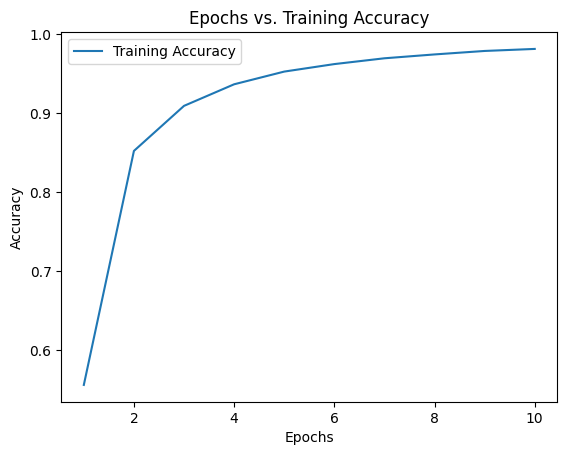

In [25]:
epochs = [i for i in range (1,11)]
plt.plot(epochs, training_history.history['accuracy'] , label='Training Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Epochs vs. Training Accuracy')
plt.savefig('Training Specs\\Epochs vs. Training Accuracy.JPG')

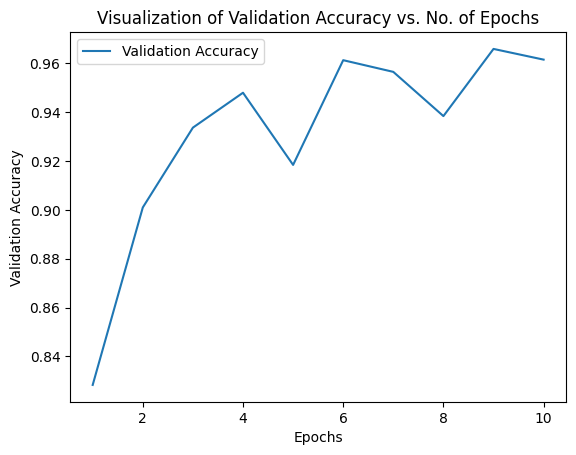

In [26]:
epochs = [i for i in range (1,11)]
plt.plot(epochs, training_history.history['val_accuracy'] , label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Visualization of Validation Accuracy vs. No. of Epochs')
plt.savefig("Training Specs\\Validation Accuracy vs. No. of Epochs.JPG")

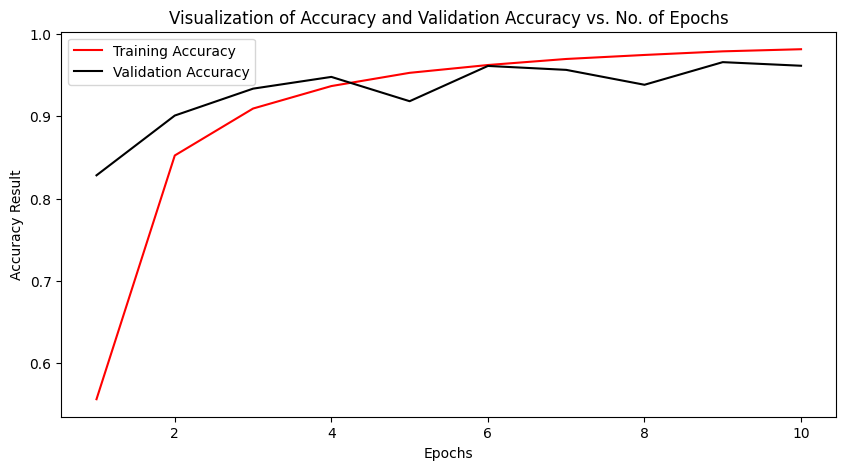

In [27]:
epochs = [i for i in range (1,11)]
plt.figure(figsize=(10,5))
plt.plot(epochs, training_history.history['accuracy'] , color='red', label='Training Accuracy' )
plt.plot(epochs, training_history.history['val_accuracy'] , color='black', label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy Result')
plt.legend()
plt.title('Visualization of Accuracy and Validation Accuracy vs. No. of Epochs')
plt.savefig("Training Accuracy and Validation Accuracy vs. No. of Epochs.JPG")

## MODEL METRICS EVALUATION

In [34]:
class_name = validation_set.class_names

with open("class_names.json", "w") as f:
    json.dump(class_name, f)

In [30]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
label_mode="categorical",
shuffle=False,
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred = model.predict(test_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step


In [37]:
y_pred, y_pred.shape


(array([[1.00000000e+00, 3.22406046e-10, 9.85221128e-13, ...,
         2.78474046e-15, 8.33109261e-16, 1.11536255e-13],
        [1.00000000e+00, 3.19683412e-11, 4.76960973e-13, ...,
         1.94750713e-14, 2.90027067e-15, 1.11275321e-13],
        [1.00000000e+00, 3.72434224e-18, 6.71712663e-20, ...,
         1.47098562e-23, 2.14250962e-23, 7.47143327e-20],
        ...,
        [1.86603359e-12, 1.92720595e-14, 4.78067363e-10, ...,
         4.66489945e-14, 9.16609928e-14, 1.00000000e+00],
        [2.68613765e-14, 8.14057888e-18, 1.51373543e-13, ...,
         8.84525855e-16, 2.30804090e-15, 1.00000000e+00],
        [1.01021262e-18, 5.33910068e-21, 9.47438049e-17, ...,
         2.32019173e-19, 1.99426504e-18, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred, axis=1)


In [39]:
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
true_categories = tf.concat([y for x,y in test_set], axis=0)


In [41]:
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
y_true = tf.argmax(true_categories, axis=1)


In [43]:
y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

## METRICS

In [44]:
from sklearn.metrics import classification_report , confusion_matrix, recall_score, precision_score, f1_score

In [45]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.99      0.92      0.96       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       440
                                   Apple___healthy       0.99      0.87      0.93       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.94      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.95      0.

In [46]:
print(confusion_matrix(y_true, predicted_categories))

[[488   1   0 ...   0   0   0]
 [  1 458   0 ...   0   0   0]
 [  0   0 432 ...   0   0   0]
 ...
 [  0   0   0 ... 477   0   0]
 [  0   0   0 ...   0 445   0]
 [  0   0   1 ...   0   0 477]]


In [47]:
confusion_matrix(y_true, predicted_categories).shape

(38, 38)

In [48]:
print(precision_score(y_true, predicted_categories, average= 'weighted'))

0.9638171774121566


In [49]:
print(recall_score(y_true, predicted_categories, average='weighted'))

0.9614727976325973


In [50]:
print(f1_score(y_true, predicted_categories, average='weighted'))

0.9617748376129371


<Axes: >

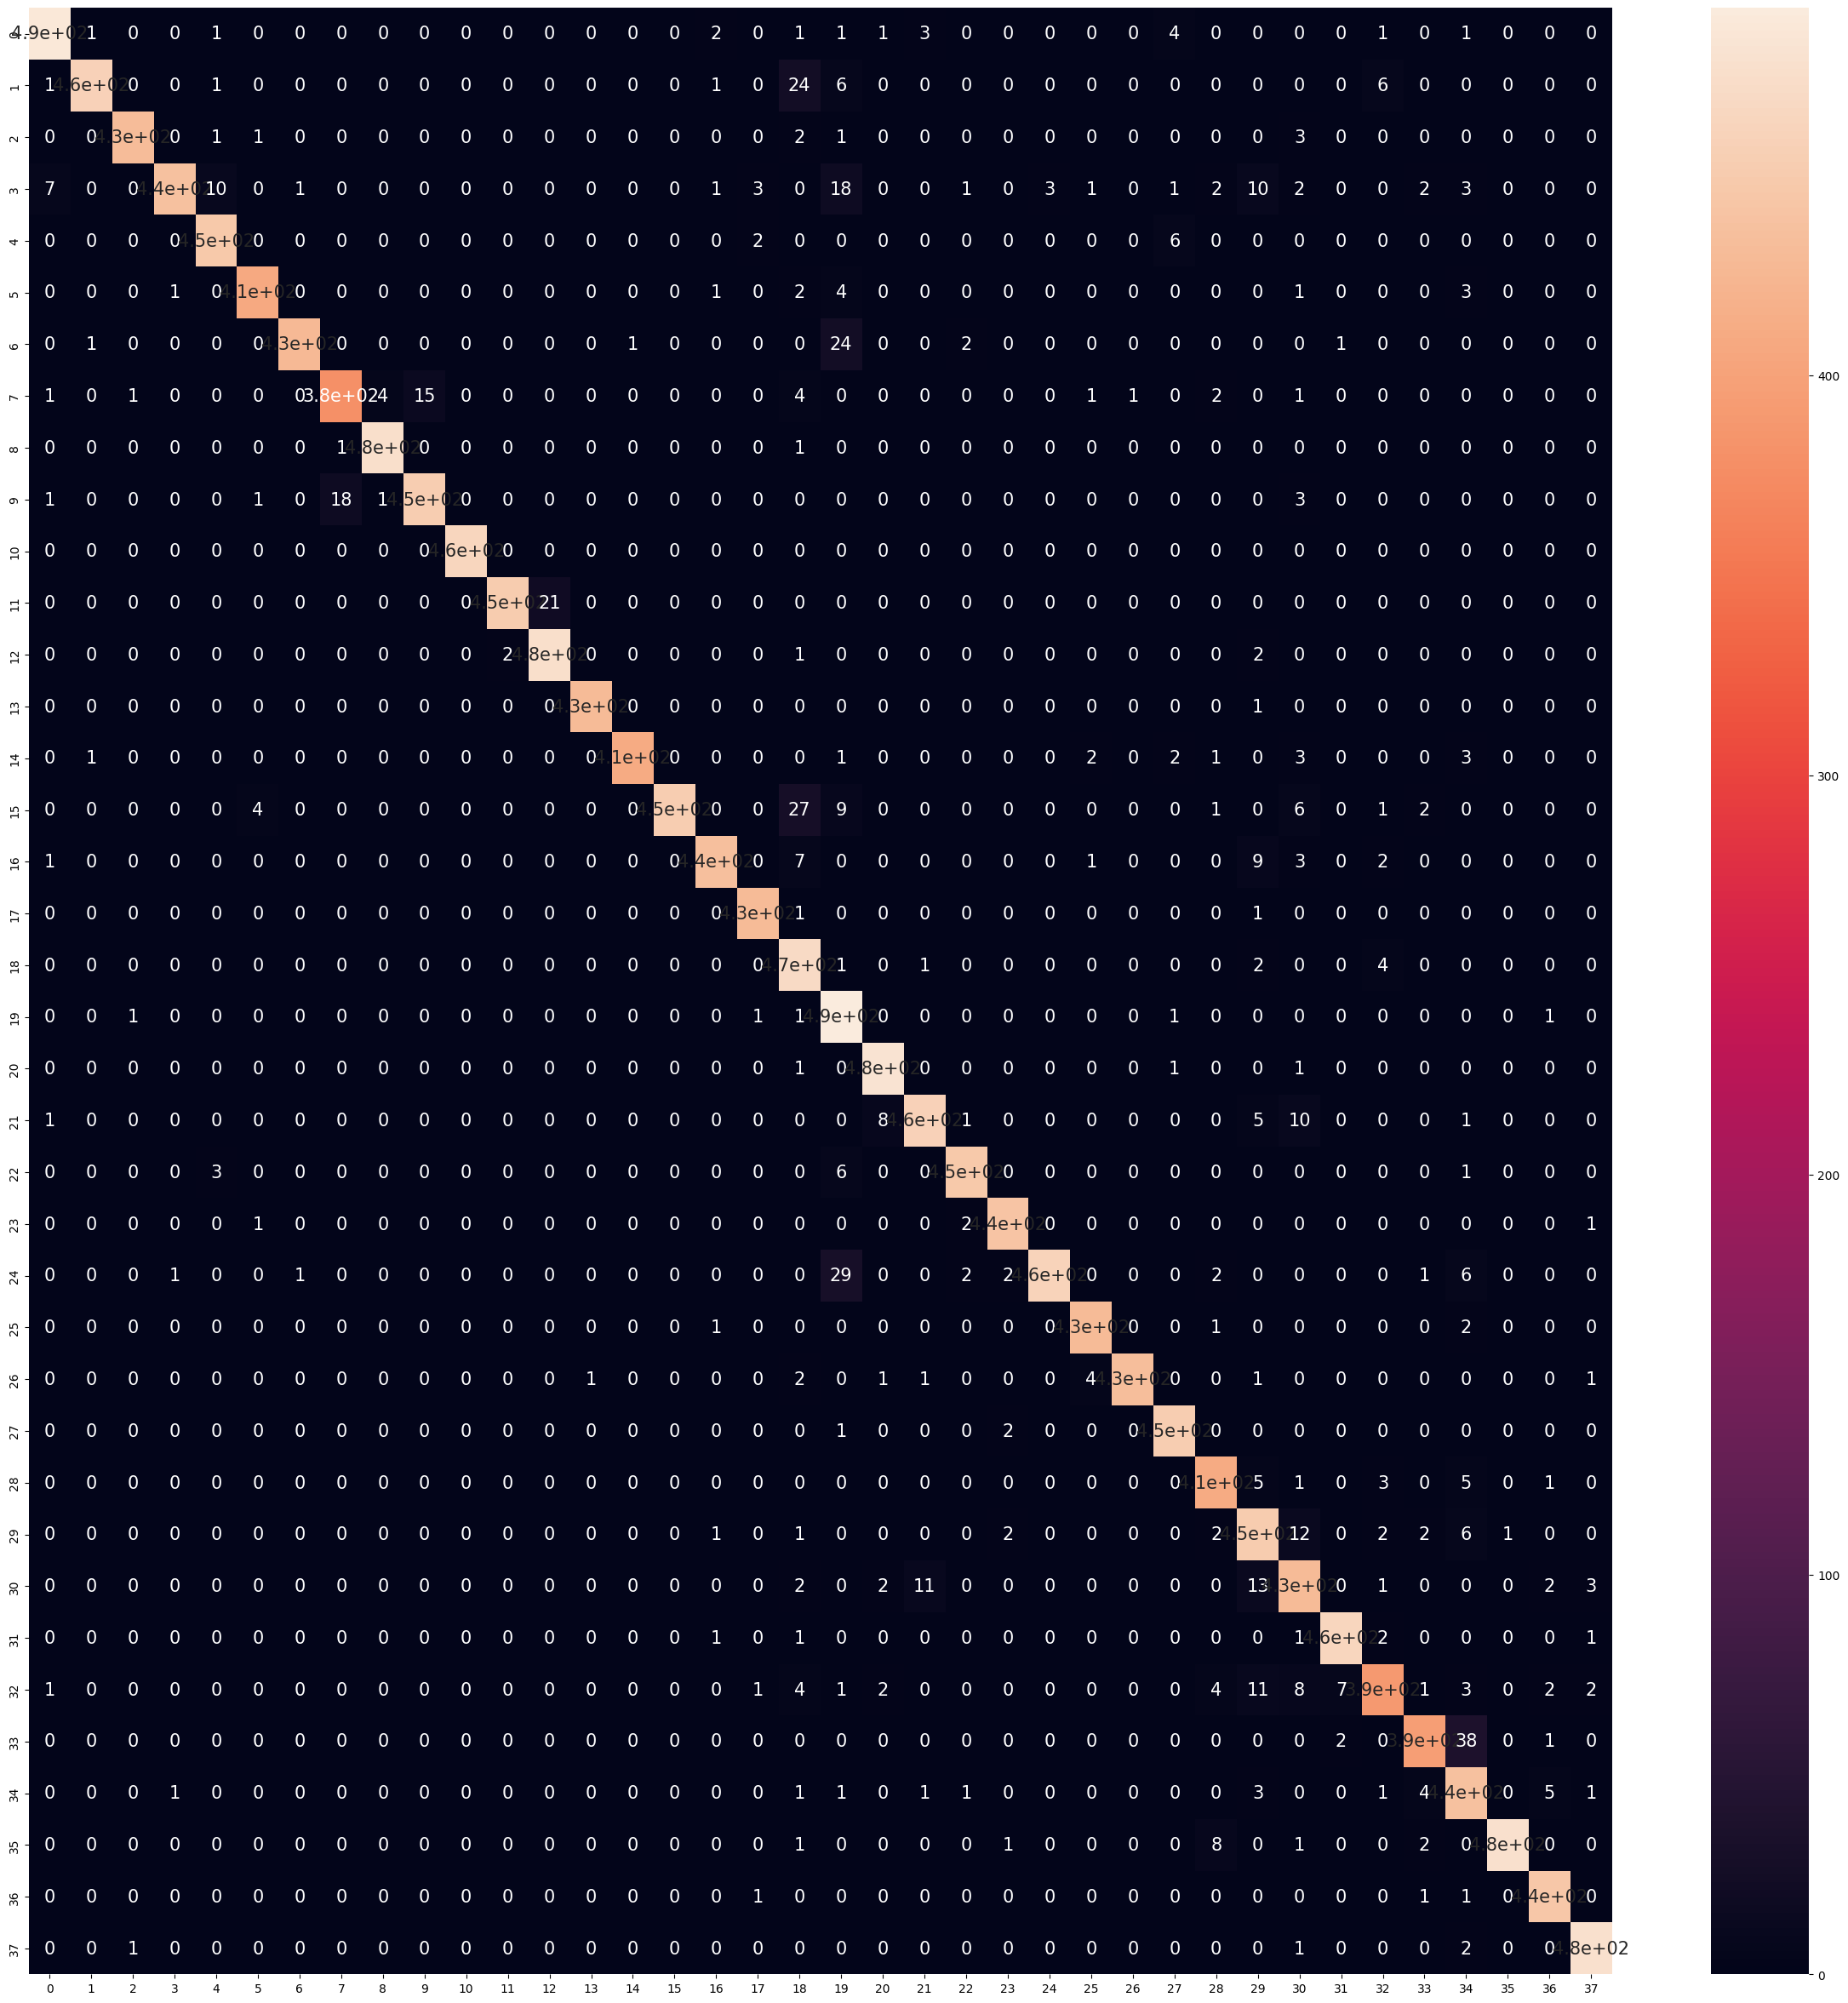

In [51]:
cnf = confusion_matrix(y_true, predicted_categories)
plt.figure(figsize=(30,30))
sns.heatmap(cnf, annot=True, annot_kws={'size':15})